In [15]:
# Portfolio: Procter & Gamble, Microsoft, Ford, General Electric
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [16]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '2001-1-1')['Adj Close']

In [17]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4503 entries, 2001-01-02 to 2018-11-23
Data columns (total 4 columns):
PG      4503 non-null float64
MSFT    4503 non-null float64
F       4503 non-null float64
GE      4503 non-null float64
dtypes: float64(4)
memory usage: 175.9 KB


In [18]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2001-01-02,22.452410,15.738796,14.989181,24.368734
2001-01-03,21.344093,17.394318,15.490105,26.631546
2001-01-04,20.682674,17.575752,16.607552,26.770794
2001-01-05,21.433464,17.825209,16.183695,26.353045
2001-01-08,21.898243,17.757162,15.798372,25.378302


In [19]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2018-11-16,93.820000,108.290001,9.05,8.02
2018-11-19,93.290001,104.620003,9.25,7.84
2018-11-20,92.099998,101.709999,9.06,7.65
2018-11-21,91.410004,103.110001,9.11,7.81
2018-11-23,91.540001,103.070000,9.13,7.57


In [20]:
# Normalization to 100

mydata.iloc[0]

PG      22.452410
MSFT    15.738796
F       14.989181
GE      24.368734
Name: 2001-01-02 00:00:00, dtype: float64

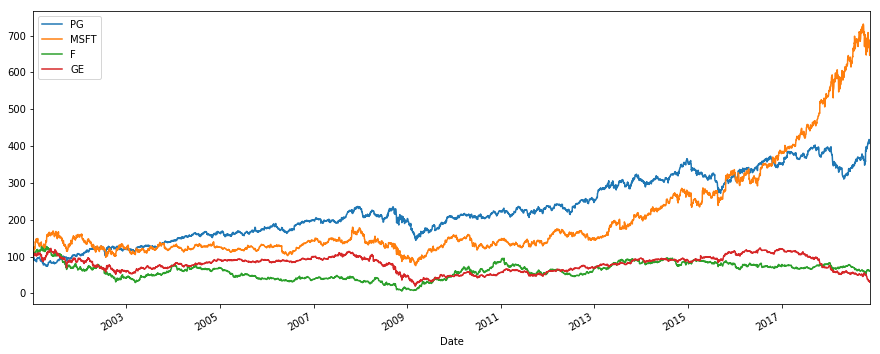

In [25]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [27]:
# Calculating the Return of a Portfolio of Securities

returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
2001-01-02,NaN,NaN,NaN,NaN
2001-01-03,-0.049363,0.105187,0.033419,0.092857
2001-01-04,-0.030988,0.010431,0.072139,0.005229
2001-01-05,0.036300,0.014193,-0.025522,-0.015605
2001-01-08,0.021685,-0.003817,-0.023809,-0.036988


In [28]:
# When weights are Procter & Gamble -- 25%, Microsoft -- 25%, Ford -- 25%, General Electric -- 25%
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [30]:
np.dot(returns, weights)

array([        nan,  0.04552515,  0.0142026 , ..., -0.02133653,
        0.00817663, -0.00687504])

In [31]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.093836
MSFT    0.144366
F       0.059020
GE     -0.019841
dtype: float64

In [32]:
np.dot(annual_returns, weights)

0.069345118533740174

In [44]:
pfolio_1 = round(np.dot(annual_returns, weights), 5) * 100
print (str(pfolio_1) + '%')

6.935%


In [45]:
# When weights are Procter & Gamble -- 40%, Microsoft -- 40%, Ford -- 15%, General Electric -- 5%
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [46]:
np.dot(annual_returns, weights_2)

0.10314150170204908

In [47]:
pfolio_2 = round(np.dot(annual_returns, weights_2), 5) * 100
print (str(pfolio_2) + '%')

10.314%


In [48]:
if (pfolio_1 > pfolio_2):
    print ('Portfolio 1 has greater returns of :' + str(pfolio_1) + '%')
elif (pfolio_1 < pfolio_2):
    print ('Portfolio 2 has greater returns of :' + str(pfolio_2) + '%')
else:
    print ('Both the portfolio has same return value of : ' + str(pfolio_1) + '%')

Portfolio 2 has greater returns of :10.314
